In [73]:
!pip3 install -q --user sklearn

You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import os

In [2]:
cur_directory = os.getcwd()

In [3]:
cur_directory

'/datos/MNO_desde_2018/ramas_repo/mno-master/temas/IV.optimizacion_convexa_y_machine_learning'

In [4]:
dir_alg_python = '/algoritmos/Python'

In [5]:
os.chdir(cur_directory + dir_alg_python)

In [6]:
import math

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA


from utils import compute_error
import algorithms_for_uco
import algorithms_for_ceco

In [7]:
dir_data = '/datos'

In [8]:
filename= cur_directory  + dir_data + '/miarchivo.txt'

In [9]:
filename

'/datos/MNO_desde_2018/ramas_repo/mno-master/temas/IV.optimizacion_convexa_y_machine_learning/datos/miarchivo.txt'

In [10]:
np.random.seed(2020)
mpoints=200
X = (np.random.rand(2,2)@np.random.normal(0,1,(2,mpoints))).T

In [11]:
np.linalg.cond(X.T@X)

101.9116499294094

In [12]:
X.shape

(200, 2)

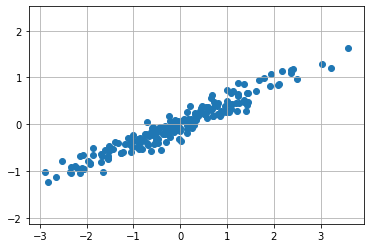

In [13]:
plt.scatter(X[:, 0], X[:, 1])
plt.grid()
plt.axis('equal');

In [14]:
pca = PCA(n_components=2,svd_solver='full')
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [15]:
print(pca.components_)

[[ 0.91945871  0.39318658]
 [ 0.39318658 -0.91945871]]


In [16]:
print(pca.explained_variance_)

[1.75356152 0.01718556]


In [17]:
pca.singular_values_

array([18.68043742,  1.84930434])

In [18]:
u,s,vt = np.linalg.svd(X)

In [19]:
s

array([18.71436107,  1.8538009 ])

In [20]:
vt.T[:,0]

array([0.91962371, 0.39280051])

In [21]:
vt.T[:,1]

array([-0.39280051,  0.91962371])

# Mínimo valor singular

Función objetivo para el mínimo valor singular elevado al cuadrado, $\sigma_{\text{min}}^2$:

$$\min_{v \in \mathbb{R}^n - \{0\}} \frac{v^TX^TXv}{v^Tv}$$

Es equivalente resolver el problema:

$$\min_{\hat{v} \in \mathbb{R}^n} \hat{v}^TX^TX\hat{v}$$


$$\text{sujeto a}: \hat{v}^T \hat{v} = 1.$$

cuya solución es $\lambda_\text{min}(X^TX)$ que representa el mínimo eigenvalor de $X^TX$.

Este último problema es equivalente a resolver:

$$\min_{v \in \mathbb{R}^n, \lambda \in \mathbb{R}} \frac{1}{2}(v^TX^TXv - \lambda(v^Tv-1))$$

pues si $f_o(v, \lambda)$ es la función objetivo, entonces:

$$\nabla f_o(v,\lambda) = 
\left[
\begin{array}{c}
X^TX v - \lambda v \\
-\frac{1}{2}(v^Tv-1)
\end{array}
\right]
$$

y si igualamos a cero esta ecuación se tiene:

$$\nabla f_o(v,\lambda) = 
\left[
\begin{array}{c}
X^TX v - \lambda v \\
-\frac{1}{2}(v^Tv-1)
\end{array}
\right] = 0.
$$

Tal ecuación implica: $X^TXv = \lambda v$ y también $v^Tv = 1$ por lo que $(v, \lambda)$ es una pareja (eigenvector, eigenvalor), de hecho el eigenvector tiene norma $1$. Como queremos minimizar $f_o(v,\lambda)$ entonces el óptimo será $\lambda_\text{min}(X^TX)$ con $v^*$ eigenvector asociado.

Obsérvese que: 

$$\nabla^2 f_o(v,\lambda) = \left [ 
\begin{array}{cc}
X^TX - \lambda I & -v \\
-v^T & 0
\end{array}
\right ]
$$

**Método de Newton aplicado al problema anterior**

Centramos a $X$:

In [22]:
X_centered = X - X.mean(axis=0)
#other option X = (X - X.mean(axis=0)) / X.std()

In [23]:
def fo(x):
    v = x[0:(x.size-1)]
    value = x[x.size-1]
    matvec = X_centered@v
    return 1/2*(matvec.dot(matvec)-value*(v.dot(v)-1))

In [24]:
x_ast=np.concatenate((pca.components_[:,1],np.array([pca.singular_values_[1]**2])))

In [25]:
x_ast

array([ 0.39318658, -0.91945871,  3.41992653])

In [26]:
tol=1e-8
tol_backtracking=1e-14
maxiter=50
p_ast=fo(x_ast)


In [27]:
x_0 = np.array([1,0,5],dtype=float)


In [28]:
x_0

array([1., 0., 5.])

In [29]:
p_ast

1.7099632626913723

In [30]:
[x,total_of_iterations,Err_plot,x_plot]=algorithms_for_uco.Newtons_method(fo, x_0,tol, 
                                                       tol_backtracking, x_ast, p_ast, maxiter)

I    Normgf   Newton Decrement  Error x_ast   Error p_ast   line search   Condition of Hessian
0    3.16e+02    3.01e+02        5.41e-01      1.46e+02       ---           3.60e+03
1    2.45e+01    3.91e+01        2.43e+00      2.48e+01       1.00e+00      4.81e+02
2    5.46e+00    3.87e+00        1.03e+00      2.24e+00       1.00e+00      6.50e+02
3    1.09e+00    1.64e-01        2.83e-01      8.48e-02       1.00e+00      5.02e+02
4    7.29e-02    4.43e-04        2.04e-02      2.22e-04       1.00e+00      3.57e+02
5    2.17e-04    1.97e-09        6.07e-05      9.87e-10       1.00e+00      3.46e+02
Error of x with respect to x_ast: 6.07e-05
Approximate solution: [ 0.39318841 -0.91946288  3.41971024]


In [31]:
x

array([ 0.39318841, -0.91946288,  3.41971024])

In [32]:
total_of_iterations

6

In [33]:
x_ast

array([ 0.39318658, -0.91945871,  3.41992653])

El valor singular $\sigma_{\text{min}}$ es la raíz cuadrada del eigenvalor mínimo de $X^TX$, $\sqrt{\lambda_{\text{min}}(X^TX)}$, que acabamos de calcular:

In [34]:
np.sqrt(x[2])

1.8492458564827692

In [35]:
s

array([18.71436107,  1.8538009 ])

In [36]:
vt

array([[ 0.91962371,  0.39280051],
       [-0.39280051,  0.91962371]])

In [37]:
compute_error(x_ast,x)

6.0715087735377764e-05

# Máximo valor singular

Función objetivo para el máximo valor singular elevado al cuadrado, $\sigma_{\text{max}}^2$:

$$\max_{v \in \mathbb{R}^n - \{0\}} \frac{v^TX^TXv}{v^Tv}$$

Por el desarrollo anterior es equivalente resolver:

$$\min_{v \in \mathbb{R}^n, \lambda \in \mathbb{R}} - \left ( \frac{1}{2}(v^TX^TXv - \lambda(v^Tv-1)) \right )$$

In [38]:
def fo_max(x):
    return -fo(x)

In [39]:
x_ast=np.concatenate((pca.components_[:,0],np.array([pca.singular_values_[0]**2])))

In [40]:
x_ast

array([  0.91945871,   0.39318658, 348.9587423 ])

In [41]:
tol=1e-8
tol_backtracking=1e-14
maxiter=50
p_ast=fo_max(x_ast)


In [42]:
x_0 = np.array([1,1,500], dtype=float)

In [43]:
x_0

array([  1.,   1., 500.])

In [44]:
p_ast

-174.47937115079444

In [45]:
[x,total_of_iterations,Err_plot,x_plot]=algorithms_for_uco.Newtons_method(fo_max, x_0,tol, 
                                                       tol_backtracking, x_ast, p_ast, maxiter)

I    Normgf   Newton Decrement  Error x_ast   Error p_ast   line search   Condition of Hessian
0    3.28e+02    2.10e+02        4.33e-01      1.23e+02       ---           4.20e+04
1    5.64e+01    1.07e+01        7.26e-02      5.57e+00       1.00e+00      8.18e+03
2    3.25e+00    5.18e-02        4.47e-03      2.60e-02       1.00e+00      6.63e+02
3    2.82e-02    2.70e-05        7.99e-05      2.03e-06       1.00e+00      3.54e+02
4    1.39e-02    -4.93e-06        3.93e-05      5.13e-06       5.00e-01      3.41e+02
Error of x with respect to x_ast: 3.93e-05
Approximate solution: [  0.91911674   0.39303247 348.97243629]


In [46]:
x

array([  0.91911674,   0.39303247, 348.97243629])

In [47]:
total_of_iterations

5

In [48]:
x_ast

array([  0.91945871,   0.39318658, 348.9587423 ])

In [49]:
np.sqrt(x[2])

18.68080395204276

In [50]:
s

array([18.71436107,  1.8538009 ])

In [51]:
vt

array([[ 0.91962371,  0.39280051],
       [-0.39280051,  0.91962371]])

In [52]:
compute_error(x_ast,x)

3.925699828318319e-05

Otra opción: *deflation*: